# Simple Linear Regression

In [3]:
import numpy as np # numpy library
import pandas as pd # pandas library
from matplotlib import pyplot as plt # plot library
import plotly.graph_objects as go # advaced plots with plotly library
import plotly.express as px # express plots with plotly library

## Loading the data

In [8]:
data = pd.read_csv('diabetes.csv') # reading the data (change the path to the location of the csv file containing dataset)

data.head() # displays 5 first rows

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## Data Exploration

In [3]:
data.describe() # a quick description of your dataset

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Let us display a scatter plot of Salary variation agains YearsExperience values

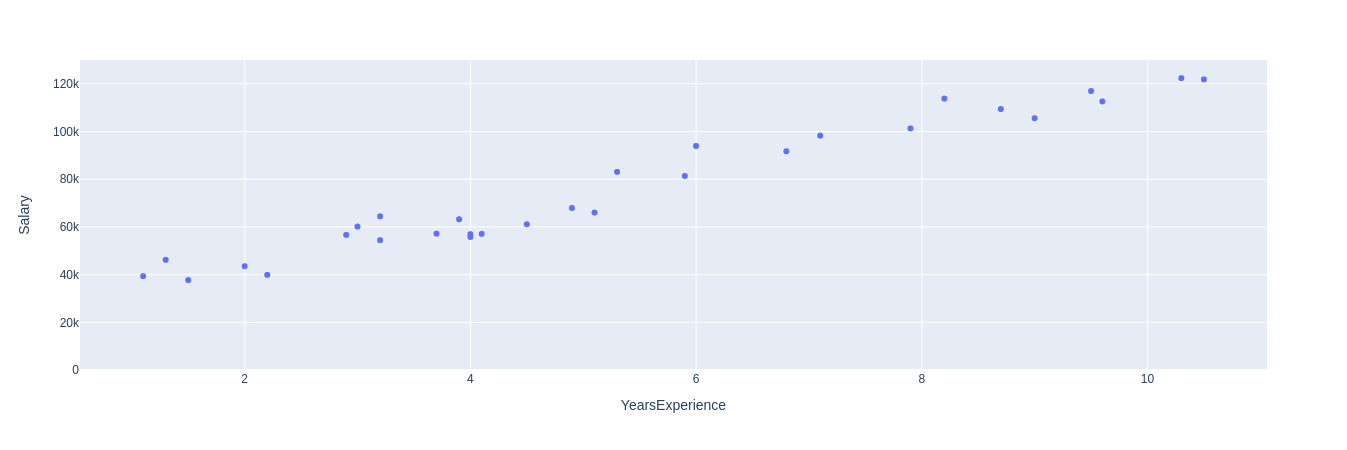

In [4]:
fig = px.scatter(data_frame=data, x='YearsExperience', y='Salary')
fig.update_layout(
    width = 500,
    autosize=False,
    yaxis_range=[0,130000]
)

In [5]:
data.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

**Hypothesis** : Predicting the Salary using YearsExperience seems to be a good idea

## Data preparation

The goal of this section is to prepare our data for the machine learning task

For the machine learning task, we need first of all to split the data between data that is going to be used for training, and data for test

**Disclaimer**: the dataset that we have has a very small size, and the number of data points that we are going to use in our test set is not sufficient to measure properly the performance of the model

Second step of data preparation will be to create vector of features (or a matrix of dimension `(n,1)` )  and target (matrix of dimension `(n,1)`


**Multiple features case**: in the case of multiple features, the matrix of feature will be of dimension `(n, number_of_features)`

In [6]:
from sklearn.model_selection import train_test_split # Helper function from sklearn to split data

In [7]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

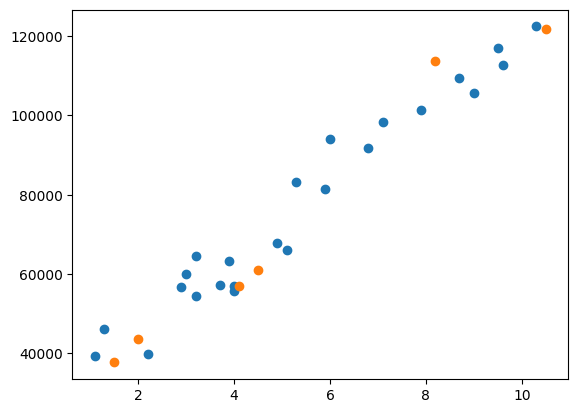

In [8]:
# This is a more manual way to split your data if it is stored in an object of pandas dataframe

np.random.seed(125)
train_data = data.sample(frac=0.8)

test_data = data.drop(train_data.index)

plt.scatter(x=train_data.YearsExperience, y = train_data.Salary)
plt.scatter(x=test_data.YearsExperience, y = test_data.Salary)

In [9]:
x_train = train_data['YearsExperience'].values.reshape(-1,1)
# We reshape the data to a format of (n,1), -1 stands for letting numpy find the right dimension for us
                
y_train = train_data['Salary'].values.reshape(-1,1)


x_test = test_data['YearsExperience'].values.reshape(-1,1)
y_test = test_data['Salary'].values.reshape(-1,1)

## Modeling

We can model the relationship between the salary and Years of experience as a line (linear relationship)

$$ y = a x + b $$
$$ Salary = Coefficient \times YearsExperience + Intercept $$

**P.S** : This is not machine learning

### Analytical solution

$ a = \frac {n\sum_{i=1}^{n} (x_{i}y_{i}) - (\sum_{i=1}^{n}x_{i})(\sum_{i=1}^{n}y_{i})}{n \sum_{i=1}^{n}x_{i}^2 - (\sum_{i=1}^{n} x_{i})^2 }$


$ b = \frac{1}{n} (\sum_{i=1}^{n} y_{i} - a \sum_{i=1}^{n} x_{i})$

In [10]:
def a_b_estimator(x,y):
    """
    Estimates parameters of the slope and interecept for simple linear regression model
        x : features of training data
        y : target values (ground truths values) for training data
    retruns
        a : the slope
        b : the intercept
    
    """
    sumx = x.sum()
    sumy = y.sum()
    sumx2 = (x**2).sum()
    sumxy = (x*y).sum()
    n = len(x)
    a = (n*sumxy - sumx * sumy) / (n*sumx2 - sumx**2)
    b = (sumy - a*sumx)/n
    return a,b

In [11]:
a,b = a_b_estimator(x_train,y_train)

In [12]:
print(f'value of the coefficient a \t: {a:0.2f}')
print(f'value of the intercept b \t: {b:0.2f}')

value of the coefficient a 	: 9204.57
value of the intercept b 	: 27552.09


In [13]:
def predictor(x, coefficent, intercept):
    """
    Computes Y using the input X and the coefficient and intercept values
    Y = coefficient*X + intercept
    
    """
    return coefficent*x + intercept

In [14]:
from functools import partial
# we fixe the values of a and be with the partial function, 
# this is not necessary, you can use directly the predictor but your need to give it values of a and b
predictor_lr = partial(predictor, coefficent = a, intercept = b) 

In [15]:
y_train_pred = predictor_lr(x_train)
y_test_pred = predictor_lr(x_test)

We plot values of true values of the target Salary, and the predicted values of Salary to be able to see the difference

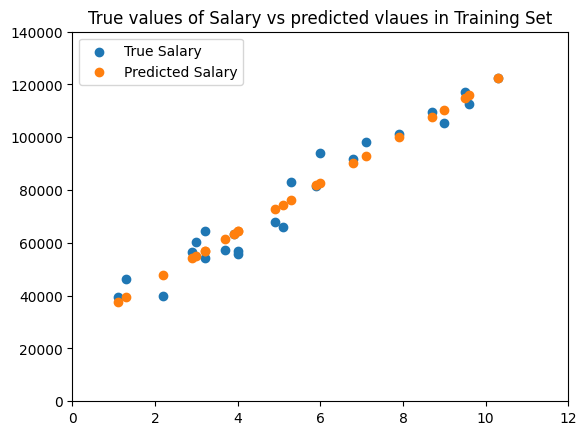

In [16]:
plt.scatter(x=x_train, y = y_train)
plt.scatter(x=x_train, y = y_train_pred)
plt.xlim([0,12])
plt.ylim([0,140000])
plt.title('True values of Salary vs predicted vlaues in Training Set')
plt.legend(['True Salary','Predicted Salary'])
plt.show()

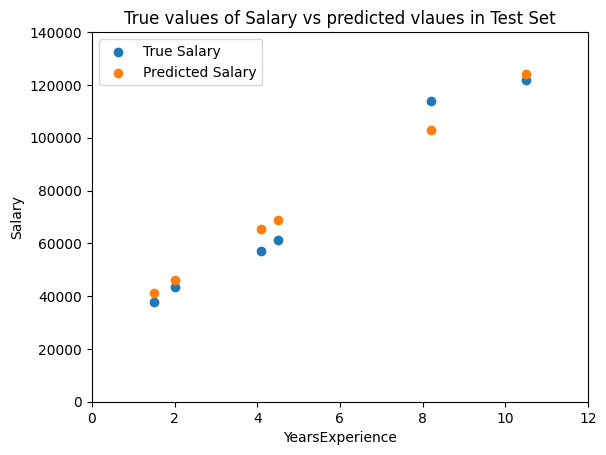

In [17]:
plt.scatter(x=x_test, y =y_test)
plt.scatter(x=x_test, y = y_test_pred)
plt.title('True values of Salary vs predicted vlaues in Test Set')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.xlim([0,12])
plt.ylim([0,140000])
plt.legend(['True Salary','Predicted Salary'])
plt.show()

**Metrics** : There are many metrics that can be computed, you can compute them manually following the formula we saw during the class, or using Sklearn

In [18]:
# Mean Squared Error
mean_square_error_train= ((y_train - y_train_pred)**2).mean()
print(f'Mean Squarred Error on Training Set {mean_square_error_train: 0.2f}')

Mean Squarred Error on Training Set  28685283.38


In [19]:
mean_square_error_test= ((y_test - y_test_pred)**2).mean()
print(f'Mean Squarred Error on Test Set {mean_square_error_test: 0.2f}')

Mean Squarred Error on Test Set  44997498.32


In [20]:
root_mean_squarred_error = ((data.Salary - predictor_lr(data.Salary))**2).mean()
root_mean_squarred_error

5.508760397317571e+17

In [21]:
mean_absolue_error = np.mean(np.absolute(y_train - y_train_pred))
mean_absolue_error

4407.140422662018

In [22]:
Rsquared = 1 -  np.sum((y_train - y_train_pred)**2) / np.sum((y_train - y_train.mean())**2)
Rsquared

0.954539770690677

### Numerical Solution - (machine learning)

#### Pseudo code
initialise $a$ and $b$ with random values

chose a learning rate value $\gamma$

compute the cost function $J = \sum_{i=1}^{n}(y_i-ax_i-b)^2$

compute $ \frac{\delta J}{\delta a} $ and $ \frac{\delta J}{\delta b} $

Update values of $a$ and $b$

$ a = a - \gamma  \frac{\delta J}{\delta a}$

$ b = b - \gamma  \frac{\delta J}{\delta b}$

#### Scikit Learn

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
model = LinearRegression()

model.fit(X=x_train, y=y_train)

y_train_pred_2 = model.predict(X=x_train)

In [25]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred_2)

28685283.37693129

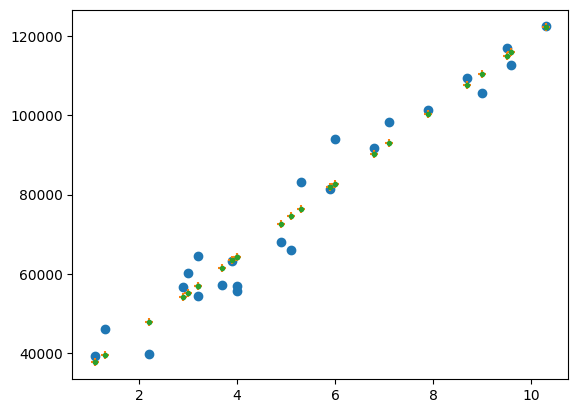

In [26]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_train_pred,marker="+")
plt.scatter(x_train,y_train_pred_2, marker=".")

In [27]:
model.coef_, model.intercept_

(array([[9204.57092341]]), array([27552.09080208]))

In [28]:
raw_x = x_train
raw_y = y_train

#### From Scratch with numpy

In [29]:
from tqdm.auto import tqdm

In [30]:
seed = 0
np.random.seed(seed)

def grad_a(ap, bp, xp, yp): # derivative of sum((y - ax -b)²) relative to a
    return (-2*xp*(yp-ap*xp -bp)).sum()

def grad_b(ap, bp, xp, yp): # derivative of sum((y - ax -b)²) relative to b
    return (-2*(yp - ap*xp -bp)).sum()


x = raw_x
y = raw_y


a = 9000
b = 27000
learning_rate = 0.0005


print('a',a,'b',b)
mse = mean_squared_error(y, a*x +b)
list_a = []
list_b = []
list_mse = []
print('initial mse', mean_squared_error(y, a*x +b))

list_a.append(a)
list_b.append(b)
list_mse.append(mse)

for i in tqdm(range(2100)):
    new_a = a - learning_rate*grad_a(a,b,x,y)
    new_b = b - learning_rate*grad_b(a,b,x,y)
    a = new_a
    b = new_b
    mse = mean_squared_error(y, a*x +b)
    list_a.append(a)
    list_b.append(b)
    list_mse.append(mse)
    
print(f'for iteration {i} a : {a} b : {b} mse : {mse}')
    
y_train_pred_3 = a*x + b

a 9000 b 27000
initial mse 31699521.916666668


  0%|          | 0/2100 [00:00<?, ?it/s]

for iteration 2099 a : 9204.575152665579 b : 27552.062682383836 mse : 28685283.377088238


### Visualisations

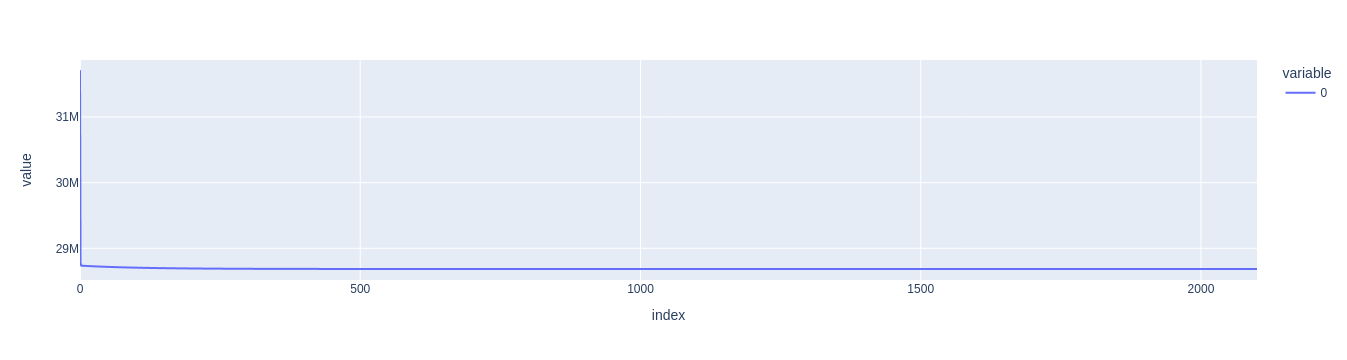

In [34]:
A = np.linspace(9000,9500,100)
B = np.linspace(27000, 27900,100)
LOSS = np.zeros((100,100))

Am, Bm = np.meshgrid(A,B)
list_mse = np.array(list_mse)
list_a = np.array(list_a)
list_b = np.array(list_b)
for i in range(len(A)):
    for j in range(len(B)):
        LOSS[i, j] = mean_squared_error(y, Am[i,j]*x + Bm[i,j])

fig = go.Figure(data=[
    go.Surface(z=LOSS, x=Am, y=Bm, opacity=0.50),
    go.Scatter3d(z=list_mse, x = list_a, y= list_b)
])
fig.update_layout(
    title='Loss per A and B', 
    autosize=True,
    scene = dict(xaxis_title='a (coefficient)',
                 yaxis_title='b (intercept)',
                 zaxis_title='loss'),
    width=1000,
    height=1000)
fig.show()
px.line(list_mse)


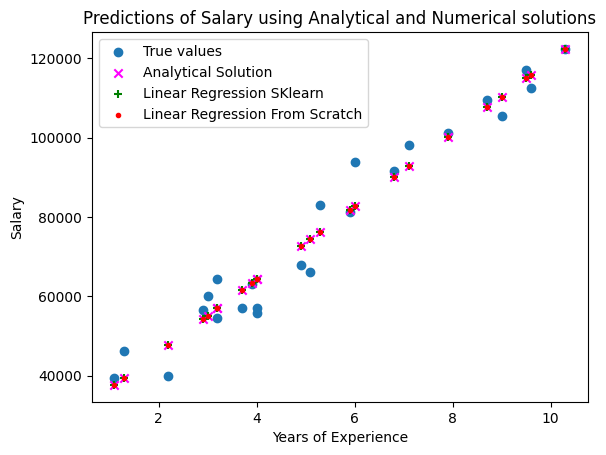

In [37]:
plt.scatter(x,y)
plt.scatter(x,y_train_pred,color='magenta', marker='x')
plt.scatter(x,y_train_pred_2, color='green', marker='+')
plt.scatter(x,y_train_pred_3, color = 'red', marker= '.')
plt.title('Predictions of Salary using Analytical and Numerical solutions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['True values', 'Analytical Solution', 'Linear Regression SKlearn', 'Linear Regression From Scratch'])
plt.show()